In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
csv_folder_dir = "data/csv/out_of_sample/"
csv_list = [x for x in os.listdir(csv_folder_dir) if not x.startswith(".")]

prices_df = None

for csv_name in csv_list:
    csv_dir = os.path.join(csv_folder_dir, csv_name)
    current_df = pd.read_csv(csv_dir, 
                             usecols=['Date', 'Close'],
                             parse_dates=['Date'])
    current_df.rename(columns={'Close': f"{csv_name[:-4]}"}, inplace=True)
    
    # Merge the current DataFrame with the final DataFrame
    if prices_df is None:
        prices_df = current_df  # Initialize with the first DataFrame
    else:
        prices_df = pd.merge(prices_df, current_df, on='Date', how='outer')  # Merge on 'Date' 

# Random portfolio

In [3]:
import random
window_size = 5
rand_long_returns = []
rand_short_returns = []
for today in range(5, len(prices_df) - 2 * window_size, 5):
    to_buy = random.sample(list(prices_df.columns[1:]), 50)
    to_sell = random.sample(list(prices_df.columns[1:]), 50)    

    long_stocks = prices_df[to_buy]
    short_stocks = prices_df[to_sell]

    long_pos_start = long_stocks.iloc[today + window_size]
    long_pos_end = long_stocks.iloc[today + 2*window_size]
    long_pos_diff = (long_pos_end - long_pos_start)/long_pos_start
    
    short_pos_start = short_stocks.iloc[today + window_size]
    short_pos_end = short_stocks.iloc[today + 2*window_size]
    short_pos_diff = -(short_pos_end - short_pos_start)/short_pos_start

    long_portfolio_return = long_pos_diff.mean()
    short_portfolio_return = short_pos_diff.mean()

    rand_long_returns.append(long_portfolio_return)
    rand_short_returns.append(short_portfolio_return)

In [4]:
rand_portfolio = pd.DataFrame({"Long portfolio": rand_long_returns,
                              "Short portfolio": rand_short_returns})
rand_portfolio["Long Short portfolio"] = rand_portfolio["Long portfolio"] + rand_portfolio["Short portfolio"]
rand_portfolio.head(3)

,Long portfolio,Short portfolio,Long Short portfolio
0,-0.020758,-0.004637,-0.025395
1,-0.006191,0.002517,-0.003674
2,0.040742,-0.022636,0.018106


In [5]:
rand_portfolio.to_csv("data/random_portfolio.csv", index = False)

In [6]:
rand_portfolio.mean()

Long portfolio          0.002492
Short portfolio        -0.002296
Long Short portfolio    0.000196
dtype: float64

In [7]:
rand_long_portfolio = 1000
rand_long_portfolio_history = []
rand_long_short_portfolio = 1000
rand_long_short_portfolio_history = []
for _, row in rand_portfolio.iterrows():
    rand_long_portfolio *= (1 + row["Long portfolio"]) 
    rand_long_short_portfolio *= (1 + row["Long Short portfolio"])
    rand_long_portfolio_history.append(rand_long_portfolio)
    rand_long_short_portfolio_history.append(rand_long_short_portfolio)

In [8]:
rand_long_portfolio

1531.2023519695342

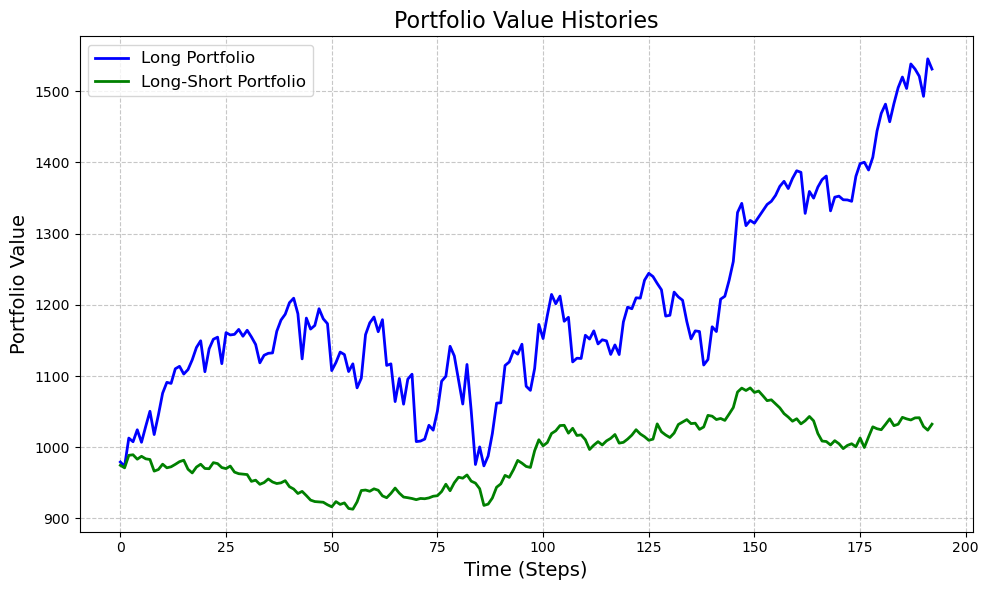

In [9]:

plt.figure(figsize=(10, 6))

# Plot the histories
plt.plot(rand_long_portfolio_history, label="Long Portfolio", color='blue', linewidth=2)
plt.plot(rand_long_short_portfolio_history, label="Long-Short Portfolio", color='green', linewidth=2)

# Add labels, legend, and title
plt.title("Portfolio Value Histories", fontsize=16)
plt.xlabel("Time (Steps)", fontsize=14)
plt.ylabel("Portfolio Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# UNIFORM

In [11]:
import random
window_size = 5
unif_long_returns = []
unif_short_returns = []
for today in range(5, len(prices_df) - 2 * window_size, 5):
    to_buy = list(prices_df.columns[1:])
    to_sell = list(prices_df.columns[1:])

    long_stocks = prices_df[to_buy]
    short_stocks = prices_df[to_sell]

    long_pos_start = long_stocks.iloc[today + window_size]
    long_pos_end = long_stocks.iloc[today + 2*window_size]
    long_pos_diff = (long_pos_end - long_pos_start)/long_pos_start
    
    short_pos_start = short_stocks.iloc[today + window_size]
    short_pos_end = short_stocks.iloc[today + 2*window_size]
    short_pos_diff = -(short_pos_end - short_pos_start)/short_pos_start

    long_portfolio_return = long_pos_diff.mean()
    short_portfolio_return = short_pos_diff.mean()

    unif_long_returns.append(long_portfolio_return)
    unif_short_returns.append(short_portfolio_return)

In [12]:
unif_portfolio = pd.DataFrame({"Long portfolio": unif_long_returns,
                              "Short portfolio": unif_short_returns})
unif_portfolio["Long Short portfolio"] = unif_portfolio["Long portfolio"] + unif_portfolio["Short portfolio"]
unif_portfolio

,Long portfolio,Short portfolio,Long Short portfolio
0,-0.008207,0.008207,0.0
1,-0.002410,0.002410,0.0
2,0.031551,-0.031551,0.0
3,0.008241,-0.008241,0.0
4,0.016197,-0.016197,0.0
...,...,...,...
188,-0.004742,0.004742,0.0
189,-0.006707,0.006707,0.0
190,-0.013666,0.013666,0.0
191,0.044686,-0.044686,0.0


In [13]:
unif_portfolio.mean()

Long portfolio          0.00254
Short portfolio        -0.00254
Long Short portfolio    0.00000
dtype: float64

In [14]:
unif_portfolio.to_csv("data/unif_portfolio.csv", index = False)

In [15]:
unif_long_portfolio = 1000
unif_long_portfolio_history = []
for _, row in unif_portfolio.iterrows():
    unif_long_portfolio *= (1 + row["Long portfolio"]) 
    unif_long_portfolio_history.append(unif_long_portfolio)

In [16]:
unif_long_portfolio

1547.0951741568208